In [16]:
import time

import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import shap


shap.initjs()

C:\Users\jav\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
  
# metadata 
# print(aids_clinical_trials_group_study_175.metadata) 
  
# variable information
y

,cid
0,0
1,1
2,0
3,0
4,0
...,...
2134,0
2135,0
2136,0
2137,1


In [42]:
import pandas as pd

np.random.seed(3333)

header_names = [f"feature_" + str(n+1) for n in range(42)]
path = "C:\\Users\\jav\\Documents\\School\\4th Year Sem 2\\CMSC 198.2\\implementations\\data\\heart.csv"
df = pd.read_csv(path, delimiter=",", names=header_names)
X = df.iloc[:, :-1].sample(n=5, axis="columns")
y = df.iloc[:, -1].replace({"RB": 1, "NRB": 0})

# print("Features (X):\n", X.shape)
# print("\nTarget Variable (y):\n",)
X

,feature_12,feature_13,feature_31,feature_26,feature_33
0,caa,thall,NaN,NaN,NaN
1,0,1,NaN,NaN,NaN
2,0,2,NaN,NaN,NaN
3,0,2,NaN,NaN,NaN
4,0,2,NaN,NaN,NaN
...,...,...,...,...,...
299,0,3,NaN,NaN,NaN
300,0,3,NaN,NaN,NaN
301,2,3,NaN,NaN,NaN
302,1,3,NaN,NaN,NaN


In [70]:
dataset = fetch_ucirepo(id=151)
X = dataset.data.features.sample(n=40, axis="columns")
y = dataset.data.targets.values.ravel()

In [81]:

# feature_names = list(X.columns)

feature_names = list(X.columns)
bit_length = len(X.columns)

bit_length
X.values


array([[0.018 , 0.02  , 0.6791, ..., 0.6415, 0.2999, 0.5078],
       [0.014 , 0.0453, 0.4423, ..., 0.32  , 0.8874, 0.8024],
       [0.0316, 0.0262, 0.6036, ..., 0.2413, 0.7551, 0.8929],
       ...,
       [0.014 , 0.0522, 0.863 , ..., 0.9986, 0.2339, 0.1962],
       [0.0034, 0.0303, 0.7032, ..., 1.    , 0.2645, 0.2828],
       [0.004 , 0.026 , 0.7123, ..., 1.    , 0.3175, 0.3714]])

In [ ]:
print(list(aids_clinical_trials_group_study_175.data.headers))

['pidnum', 'cid', 'time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820']


In [ ]:
from pandas import DataFrame
from sklearn.datasets import load_iris

dataset = load_iris()
df = DataFrame(dataset.data)
df.columns = dataset.feature_names

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    *shap.datasets.iris(), test_size=0.2, random_state=0
)

# rather than use the whole training set to estimate expected values, we could summarize with
# a set of weighted kmeans, each weighted by the number of points they represent. But this dataset
# is so small we don't worry about it
# X_train_summary = shap.kmeans(X_train, 50)


def print_accuracy(f):
    print(f"Accuracy = {100 * np.sum(f(X_test) == Y_test) / len(Y_test)}%")
    time.sleep(0.5)  # to let the print get out before any progress bars

In [ ]:
selected_features = X_train.iloc[:,[2,3]]
selected_test = X_test.iloc[:,[2,3]]
rforest = RandomForestClassifier(
    n_estimators=100, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(selected_features, Y_train)
# print_accuracy(rforest.predict)

RandomForestClassifier(random_state=0)

In [ ]:
explainer = shap.KernelExplainer(rforest.predict_proba, selected_features)
shap_values = explainer(selected_test)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 30/30 [00:00<00:00, 112.85it/s]


In [ ]:
shap_values[0][:,:]
# sum([0.325     , 0.31199286, 0.36300714])

.values =
array([[-0.16575   , -0.17182421,  0.33757421],
       [-0.15925   , -0.14016865,  0.29941865]])

.base_values =
array([0.325     , 0.31199286, 0.36300714])

.data =
array([5.1, 2.4])

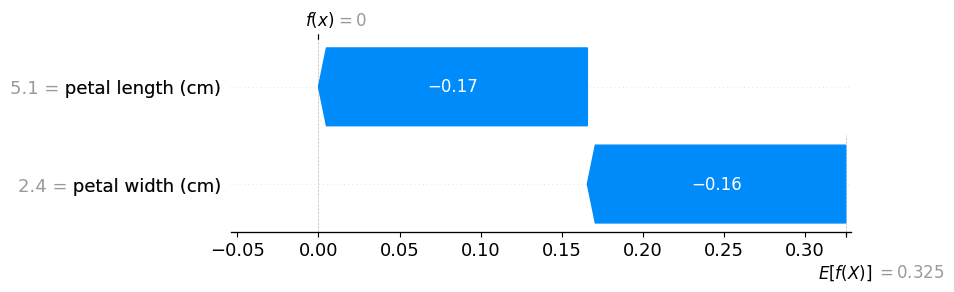

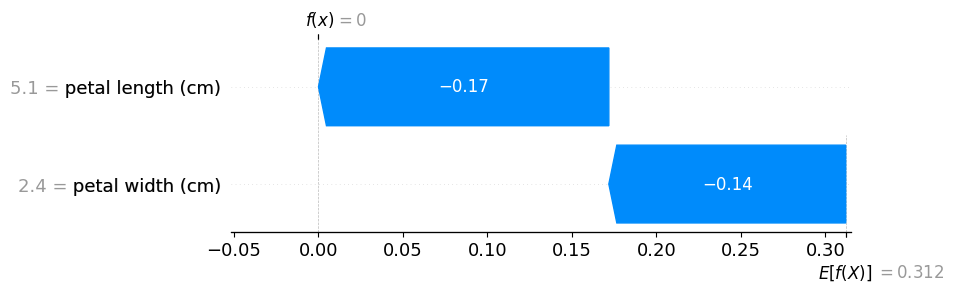

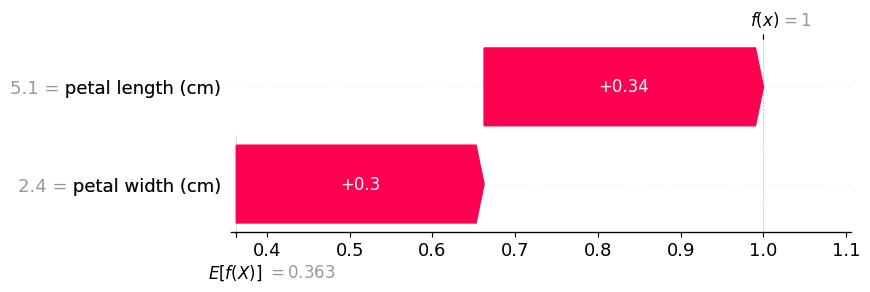

In [ ]:
for i in range(3):
    shap.plots.waterfall(shap_values[0][:,i])

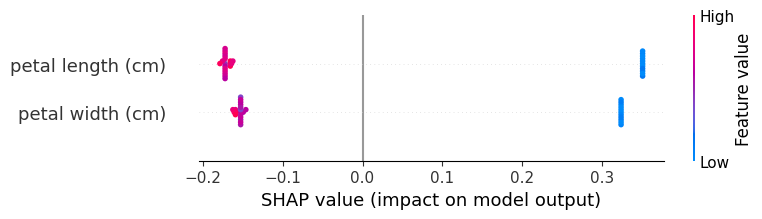

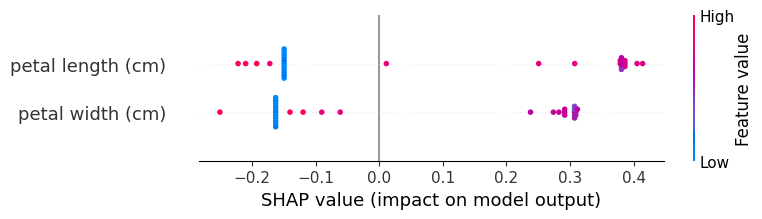

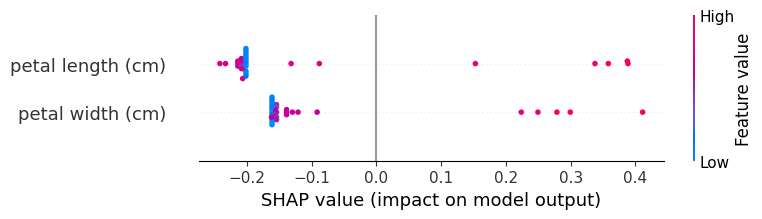

In [ ]:
# shap.plots.waterfall(shap_values[0,0,0])
    # print(shap_values[:,:,i].shape, X_test.shape)
for i in range(3):
    shap.summary_plot(shap_values[:,:,i], selected_test)

In [ ]:
shap_values[0][:,0]

.values =
array([-0.16575, -0.15925])

.base_values =
0.3250000000000002

.data =
array([5.1, 2.4])

In [ ]:
shap_values[0][:,0]

.values =
array([-0.16575, -0.15925])

.base_values =
0.3250000000000002

.data =
array([5.1, 2.4])

In [87]:
path = "C:\\Users\\jav\\Documents\\School\\4th Year Sem 2\\CMSC 198.2\\implementations\\data\\TUANDROMD.csv"
df = pd.read_csv(path)
df['Label'] = df['Label'].replace({"malware": 1, "goodware": 0})
if df['Label'].isna().sum() > 0:
    df = df.dropna(subset=['Label'])
X = df.iloc[:, :-1].sample(n=40, axis="columns")
feature_names = df.columns
bit_length = len(feature_names) - 1
y = df.iloc[:, -1].values
X = X.values

y


C:\Users\jav\AppData\Local\Temp\ipykernel_33760\4163682030.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace({"malware": 1, "goodware": 0})


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])